In [59]:
import pandas as pd
data = pd.read_csv('data/house_price.csv', encoding='utf-8')
data.head()

,housing_age,income,bedrooms,households,rooms,house_value
0,23,6.7770,0.141112,2.442244,8.103960,500000
1,49,6.0199,0.160984,2.726688,5.752412,500000
2,35,5.1155,0.249061,1.902676,3.888078,500000
3,32,4.7109,0.231383,1.913669,4.508393,500000
4,21,4.5625,0.255583,3.092664,4.667954,500000


(17689, 6)


array([[<AxesSubplot:title={'center':'housing_age'}>,
        <AxesSubplot:title={'center':'income'}>],
       [<AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'households'}>],
       [<AxesSubplot:title={'center':'rooms'}>,
        <AxesSubplot:title={'center':'house_value'}>]], dtype=object)

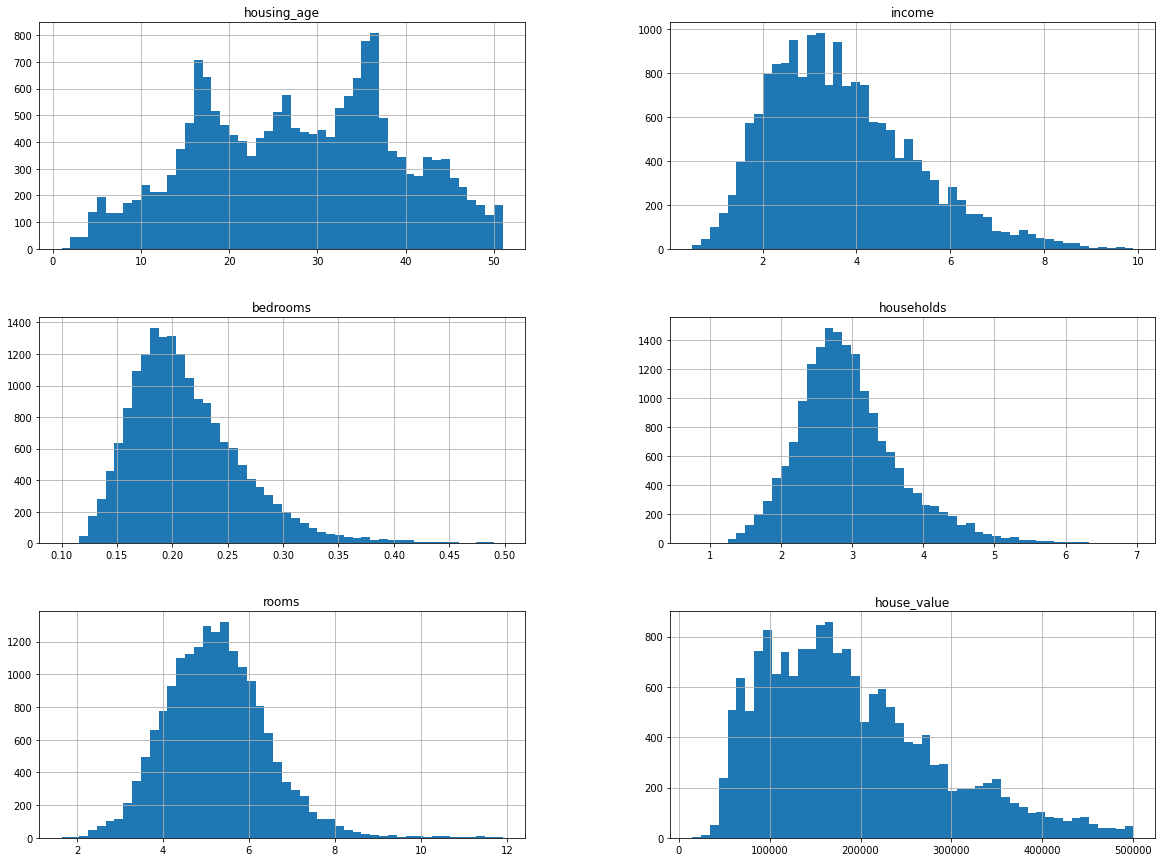

In [60]:
print(data.shape)
data.hist(bins=50, figsize=(20,15))

In [61]:
# 특성(x)과 레이블(y) 나누기
# X1 = data.loc[:, 'housing_age':'rooms']
X1 = data[data.columns[:5]]
X1

,housing_age,income,bedrooms,households,rooms
0,23,6.7770,0.141112,2.442244,8.103960
1,49,6.0199,0.160984,2.726688,5.752412
2,35,5.1155,0.249061,1.902676,3.888078
3,32,4.7109,0.231383,1.913669,4.508393
4,21,4.5625,0.255583,3.092664,4.667954
...,...,...,...,...,...
17684,34,2.3013,0.214583,2.748299,4.897959
17685,33,2.6750,0.246622,3.428571,4.698413
17686,39,2.3667,0.340771,1.876812,3.572464
17687,19,2.1000,0.386107,2.987805,3.774390


In [62]:
y = data[['house_value']]
y

,house_value
0,500000
1,500000
2,500000
3,500000
4,500000
...,...
17684,26600
17685,22500
17686,17500
17687,14999


In [85]:
# train-test 데이터셋 나누기
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y, random_state=42)

In [86]:
print(y_train.mean())
print(y_test.mean())

house_value    189260.967812
dtype: float64
house_value    188391.001357
dtype: float64


In [87]:
# 정규화
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

scaler_minmax= MinMaxScaler()
scaler_standard= StandardScaler()

In [88]:
scaler_minmax.fit(X_train)
X_scaled_minmax_train = scaler_minmax.transform(X_train)

In [89]:
scaler_standard.fit(X_train)
X_scaled_standard_train = scaler_standard.transform(X_train)

In [90]:
pd.DataFrame(X_scaled_standard_train).describe()

,0,1,2,3,4
count,1.326600e+04,1.326600e+04,1.326600e+04,1.326600e+04,1.326600e+04
mean,7.163809e-17,1.414015e-16,8.012754e-16,-3.802844e-17,-3.706434e-16
std,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00
min,-2.342832e+00,-2.081653e+00,-2.206729e+00,-3.030366e+00,-2.850578e+00
25%,-8.306782e-01,-7.413514e-01,-6.982778e-01,-6.572081e-01,-6.868994e-01
50%,5.882409e-02,-1.430799e-01,-1.768626e-01,-1.283229e-01,-4.124140e-02
75%,7.704259e-01,6.097813e-01,5.261181e-01,5.013487e-01,6.004859e-01
max,2.104679e+00,4.092478e+00,5.544819e+00,5.442457e+00,5.652123e+00


In [91]:
pd.DataFrame(X_scaled_standard_train)

,0,1,2,3,4
0,-1.364380,-1.059064,-0.543028,1.381778,0.963457
1,0.859376,0.215922,-0.813337,-0.280594,0.956010
2,-0.296977,1.456840,-1.145912,0.033982,1.200143
3,-0.919628,-1.793217,0.547497,0.431544,-0.608938
4,-1.008579,-0.628051,-0.357519,-0.366490,0.974119
...,...,...,...,...,...
13261,-1.720180,-0.387601,0.456831,1.435470,-0.595195
13262,-1.275429,-0.964407,1.015393,2.093135,-0.765932
13263,1.215177,-0.649385,0.536774,1.648048,-0.471240
13264,-0.563828,0.931892,-0.702725,-0.927581,0.850881


In [92]:
scaler_minmax.fit(X_test)
X_scaled_minmax_test = scaler_minmax.transform(X_test)

scaler_standard.fit(X_test)
X_scaled_standard_test = scaler_standard.transform(X_test)

In [93]:
pd.DataFrame(X_scaled_standard_train)

,0,1,2,3,4
0,-1.364380,-1.059064,-0.543028,1.381778,0.963457
1,0.859376,0.215922,-0.813337,-0.280594,0.956010
2,-0.296977,1.456840,-1.145912,0.033982,1.200143
3,-0.919628,-1.793217,0.547497,0.431544,-0.608938
4,-1.008579,-0.628051,-0.357519,-0.366490,0.974119
...,...,...,...,...,...
13261,-1.720180,-0.387601,0.456831,1.435470,-0.595195
13262,-1.275429,-0.964407,1.015393,2.093135,-0.765932
13263,1.215177,-0.649385,0.536774,1.648048,-0.471240
13264,-0.563828,0.931892,-0.702725,-0.927581,0.850881


In [94]:
X_scaled_standard_train.shape

(13266, 5)

In [95]:
y_train.shape

(13266, 1)

In [96]:
# 모델 학습
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_scaled_minmax_train, y_train)

LinearRegression()

In [97]:
pred_train = model.predict(X_scaled_minmax_train)
model.score(X_scaled_minmax_train, y_train)

0.5706921210926265

In [99]:
pred_test = model.predict(X_scaled_minmax_test)
model.score(X_scaled_minmax_test, y_test)

0.5817349363867992

In [101]:
# RSME
import numpy as np
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test, pred_test)
np.sqrt(MSE)

61828.43721035346

In [102]:
# MAE
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, pred_test)

46379.8751749993

In [103]:
# MSE
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, pred_test)

3822755647.874621

In [105]:
# MAPE
def MAPE(y_test, y_pred):
    return np.mean(np.abs((y_test- pred_test) / y_test))  * 100
MAPE(y_test, pred_test)

house_value    30.671845
dtype: float64

In [107]:
# MAE
def MAE(y_test, y_pred):
    return np.mean((y_test - pred_test) / y_test) * 100
MAE(y_test, pred_test)

house_value   -12.864669
dtype: float64

In [110]:
prob_train = model.predict(X_scaled_minmax_train)
y_train[['y_pred']] = pred_train
y_train

,house_value,y_pred
17235,56700,30143.543694
14220,101400,199835.492874
3280,271400,272103.037256
15279,88900,28899.099715
14727,95300,113477.567588
...,...,...
11284,142400,115628.685921
11964,134200,77955.022737
5390,225000,137618.822679
860,378200,255862.726626


In [111]:
prob_test = model.predict(X_scaled_minmax_test)
y_test[['y_pred']] = pred_test
y_test

,house_value,y_pred
17552,48500,34419.673771
5659,220500,264637.893164
5954,215800,212855.880369
733,390000,290275.329073
10290,155200,138553.883366
...,...,...
7770,185300,262195.254585
1822,328900,229387.274030
811,382400,287300.700627
868,377300,154317.796669


In [112]:
Total_test = pd.concat([X_test, y_test], axis=1)

In [113]:
Total_test

,housing_age,income,bedrooms,households,rooms,house_value,y_pred
17552,19,1.0481,0.251874,3.670846,4.181818,48500,34419.673771
5659,26,5.8683,0.132936,2.730483,7.172862,220500,264637.893164
5954,37,4.1094,0.177939,2.652582,5.830986,215800,212855.880369
733,16,6.3258,0.169569,3.155340,6.412621,390000,290275.329073
10290,32,2.2950,0.293907,4.188742,3.695364,155200,138553.883366
...,...,...,...,...,...,...,...
7770,34,5.5238,0.169824,3.451264,5.335740,185300,262195.254585
1822,19,3.8819,0.226279,1.897600,4.755200,328900,229387.274030
811,40,5.7143,0.148075,2.704819,6.102410,382400,287300.700627
868,16,2.6250,0.229714,1.910828,5.573248,377300,154317.796669


In [114]:
Total_test.to_csv("data/new-regression_test.csv")